In [2]:
""""This is Bryan Allen's submission for IDB10's Final Porfolio Python-Jupyter-Pandas-GitHub. It is based on a popular database of
nutrition data from McD's Menu Item in India! There are three Q's I am curious to know and will attempt to use data manipulation to
answer:
1.) What is the most unhealthy item on the Menu?
2.) What item has HIGHEST ratio of sugar to serving size?
3.) What item has HIGHEST ration of sodium to serving size?
I hope that some these insights can help our programmer friends on Indian sub-continent make healthy choices for themselve and their
familes and responsibly enjoy these unique Indian-American treats. Who knows, maybe some of them will choose to work with McDs in future"""

'"This is Bryan Allen\'s submission for IDB10\'s Final Porfolio Python-Jupyter-Pandas-GitHub. It is based on a popular database of\nnutrition data from McD\'s Menu Item in India! There are three Q\'s I am curious to know and will attempt to use data manipulation to\nanswer:\n1.) What is the most unhealthy item on the Menu?\n2.) What item has HIGHEST ratio of sugar to serving size?\n3.) What item has HIGHEST ration of sodium to serving size?\nI hope that some these insights can help our programmer friends on Indian sub-continent make healthy choices for themselve and their\nfamiles and responsibly enjoy these unique Indian-American treats. Who knows, maybe some of them will choose to work with McDs in future'

In [3]:
import pandas as pandas
import numpy as numpy

In [4]:
"""NOTE: My project contains modules and libraries that are named according to MY naming convetions, since I am the only
programmer working on this Notebook. I'm aware that on teams the standard naming convention is to create abbreviated aliases, and when
I'm on those teams I will defer to their conventions, but if the project is mine I will name the modules whatever I wish. My house My rules
- Bryan Allen, apprentice Data Engineer
Lusaka Zambia August 2022"""


"NOTE: My project contains modules and libraries that are named according to MY naming convetions, since I am the only\nprogrammer working on this Notebook. I'm aware that on teams the standard naming convention is to create abbreviated aliases, and when\nI'm on those teams I will defer to their conventions, but if the project is mine I will name the modules whatever I wish. My house My rules\n- Bryan Allen, apprentice Data Engineer\nLusaka Zambia August 2022"

In [5]:
dataframe = pandas.read_csv('India_Menu.csv')
print("Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with")
print()
print(dataframe.head(2))
print(dataframe.tail(2))

Taking a look at the head and tail of our DB can quickly give us an idea how long and how wide is the DB we're working with

  Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu      McVeggie™ Burger          168 g         402.05   
1  Regular Menu  McAloo Tikki Burger®          146 g         339.52   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0                   56.54              7.90              4.49       706.13  
1                   50.27              7.05              4.07       545.34  
       Menu Category            Menu Items Per Serve Size  Energy (kCal)  \
139  Condiments Menu            Sweet Corn           40 g          45.08   
140  Condiments Menu  Mixed Fruit Bev

In [6]:
item_count = dataframe['Menu Items'].count()
print("There are", item_count, "items in the dataframe")
print("Let's take look at our column headers as a list")
list(dataframe.columns)

There are 141 items in the dataframe
Let's take look at our column headers as a list


['Menu Category',
 'Menu Items',
 'Per Serve Size',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)']

In [7]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace(u"\u2122",'')

In [8]:
for col in list(dataframe.columns):
    ## print(dataframe[col].str.replace(u"\u2122",''))
    dataframe[col] = dataframe[col].astype(str).str.replace("®",'')

In [9]:
print(dataframe.head(10))

  Menu Category              Menu Items Per Serve Size Energy (kCal)  \
0  Regular Menu         McVeggie Burger          168 g        402.05   
1  Regular Menu     McAloo Tikki Burger          146 g        339.52   
2  Regular Menu   McSpicy Paneer Burger          199 g        652.76   
3  Regular Menu       Spicy Paneer Wrap          250 g        674.68   
4  Regular Menu     American Veg Burger          177 g        512.17   
5  Regular Menu        Veg Maharaja Mac          306 g        832.67   
6  Regular Menu  Green Chilli Aloo Naan          132 g        356.09   
7  Regular Menu              Pizza Puff           87 g        228.21   
8  Regular Menu       Mc chicken Burger          173 g         400.8   
9  Regular Menu    FILLET-O-FISH Burger          136 g        348.11   

  Protein (g) Total fat (g) Sat Fat (g) Trans fat (g) Cholesterols (mg)  \
0       10.24         13.83        5.34          0.16              2.49   
1         8.5         11.31        4.27           0.2    

In [10]:
num_unique_cats = dataframe["Menu Category"].nunique()
print("There are", num_unique_cats,"unique categories of menu items. Let's take look at them:")
print(dataframe["Menu Category"].value_counts())
print()
print("Hey, this looks like good opportunity create a Histogram!")
print("Let's visualize the dispersion of these categories")
## dataframe.plot.hist(dataframe["Menu Category"].value_counts())

There are 7 unique categories of menu items. Let's take look at them:
McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64

Hey, this looks like good opportunity create a Histogram!
Let's visualize the dispersion of these categories


In [11]:
""" What item has HIGHEST ratio of sugar to serving size?
In order try answer this Q I will utilize a scatterplot, with serving\n
size for x-axis and sugars on the y-axis. Later I will do some arithmetic\n
to calculate the respecive ratios"""

' What item has HIGHEST ratio of sugar to serving size?\nIn order try answer this Q I will utilize a scatterplot, with serving\n\nsize for x-axis and sugars on the y-axis. Later I will do some arithmetic\n\nto calculate the respecive ratios'

In [13]:
for i in range(len(dataframe['Per Serve Size'])):
    curr_cell = dataframe['Per Serve Size'][i]
    curr_cell = curr_cell.split(' ')
    dataframe['Per Serve Size'][i] = curr_cell[0]
    i += 1

<AxesSubplot:xlabel='Total Sugars (g)', ylabel='Per Serve Size'>

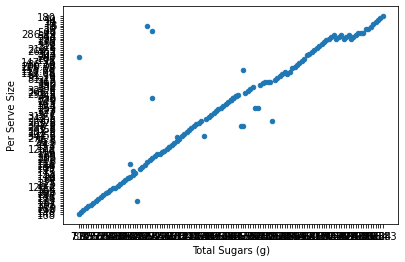

In [17]:
dataframe.plot.scatter(
    x = 'Total Sugars (g)',
    y = 'Per Serve Size'
)
